In [ ]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [ ]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# install nltk
# NLTK: Natural Language tool kit
!pip install nltk

In [ ]:
# install gensim
# Gensim is an open-source library for unsupervised topic modeling and natural language processing
# Gensim is implemented in Python and Cython.
!pip install gensim

In [ ]:
# load the stock news data
data = pd.read_csv("...............",usecols=[1,2])

In [ ]:
# Let's view the dataset 
data

,Text,d
0,@GHMCOnline @CPHydCity @MinisterKTR @Eatala_Ra...,0.120000
1,"""Delhi government will pay salaries to all con...",-0.033333
2,@nitinbhatia121 NGO to save suffering humanity...,0.000000
3,All of us should participate in Janata curfew ...,0.000000
4,Must watch \nStrong message 🙏🏻 #coronavirusind...,0.433333
...,...,...
177541,"As the cases are rising at a very high speed, ...",0.307394
177542,@KAMALSARIN6 @ShamikaRavi @PMOIndia @narendram...,0.032955
177543,"For the first time perhaps, someone to took ti...",0.446429
177544,Odisha reports 129 new #COVID19 positive cases...,0.057576


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177546 entries, 0 to 177545
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Text    177546 non-null  object 
 1   d       173986 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.7+ MB


In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Let's define a function to remove punctuations
def remove_punc(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)

    return Test_punc_removed_join

In [ ]:
data['Text Without Punctuation'] = data['Text'].apply(remove_punc)

In [ ]:
data

,Text,d,Text Without Punctuation
0,@GHMCOnline @CPHydCity @MinisterKTR @Eatala_Ra...,0.120000,GHMCOnline CPHydCity MinisterKTR EatalaRajende...
1,"""Delhi government will pay salaries to all con...",-0.033333,Delhi government will pay salaries to all cont...
2,@nitinbhatia121 NGO to save suffering humanity...,0.000000,nitinbhatia121 NGO to save suffering humanity ...
3,All of us should participate in Janata curfew ...,0.000000,All of us should participate in Janata curfew ...
4,Must watch \nStrong message 🙏🏻 #coronavirusind...,0.433333,Must watch \nStrong message 🙏🏻 coronavirusindi...
...,...,...,...
177541,"As the cases are rising at a very high speed, ...",0.307394,As the cases are rising at a very high speed I...
177542,@KAMALSARIN6 @ShamikaRavi @PMOIndia @narendram...,0.032955,KAMALSARIN6 ShamikaRavi PMOIndia narendramodi ...
177543,"For the first time perhaps, someone to took ti...",0.446429,For the first time perhaps someone to took tim...
177544,Odisha reports 129 new #COVID19 positive cases...,0.057576,Odisha reports 129 new COVID19 positive cases ...


In [ ]:
data['Text'][2]

'@nitinbhatia121 NGO to save suffering humanity from Corona'

In [ ]:
data['Text Without Punctuation'][2]

'nitinbhatia121 NGO to save suffering humanity from Corona'

In [ ]:
# download stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.remove('not')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year'])
# stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https'])

In [ ]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 1 and token not in stop_words:
            result.append(token)
            
    return result

In [ ]:
# apply pre-processing to the text column
data['Text Without Punc & Stopwords'] = data['Text Without Punctuation'].apply(preprocess)

In [ ]:
data['Text'][0]

'@GHMCOnline @CPHydCity @MinisterKTR @Eatala_Rajender \nI think all restaurants must be closed in Hyderabad, which restricts the people gathering. Please take necessary actions, if restaurants remains open. \nMy sincere thanks for all work you are doing stop 🛑 Corona Virus..🙏🙏🙏 https://t.co/Rjw4r4wDmD'

In [ ]:
data['Text Without Punc & Stopwords'][0]

['ghmconline',
 'cphydcity',
 'ministerktr',
 'eatalarajender',
 'think',
 'restaurants',
 'must',
 'closed',
 'hyderabad',
 'restricts',
 'people',
 'gathering',
 'please',
 'take',
 'necessary',
 'actions',
 'restaurants',
 'remains',
 'open',
 'sincere',
 'thanks',
 'work',
 'stop',
 'corona',
 'virus',
 'httpstcorjw',
 'wdmd']

In [ ]:
data

,Text,d,Text Without Punctuation,Text Without Punc & Stopwords
0,@GHMCOnline @CPHydCity @MinisterKTR @Eatala_Ra...,0.120000,GHMCOnline CPHydCity MinisterKTR EatalaRajende...,"[ghmconline, cphydcity, ministerktr, eatalaraj..."
1,"""Delhi government will pay salaries to all con...",-0.033333,Delhi government will pay salaries to all cont...,"[delhi, government, pay, salaries, contract, w..."
2,@nitinbhatia121 NGO to save suffering humanity...,0.000000,nitinbhatia121 NGO to save suffering humanity ...,"[nitinbhatia, ngo, save, suffering, humanity, ..."
3,All of us should participate in Janata curfew ...,0.000000,All of us should participate in Janata curfew ...,"[us, participate, janata, curfew, proposed, ht..."
4,Must watch \nStrong message 🙏🏻 #coronavirusind...,0.433333,Must watch \nStrong message 🙏🏻 coronavirusindi...,"[must, watch, strong, message, corona, gayacit..."
...,...,...,...,...
177541,"As the cases are rising at a very high speed, ...",0.307394,As the cases are rising at a very high speed I...,"[cases, rising, high, speed, india, among, top..."
177542,@KAMALSARIN6 @ShamikaRavi @PMOIndia @narendram...,0.032955,KAMALSARIN6 ShamikaRavi PMOIndia narendramodi ...,"[kamalsarin, shamikaravi, pmoindia, narendramo..."
177543,"For the first time perhaps, someone to took ti...",0.446429,For the first time perhaps someone to took tim...,"[first, time, perhaps, someone, took, time, ac..."
177544,Odisha reports 129 new #COVID19 positive cases...,0.057576,Odisha reports 129 new COVID19 positive cases ...,"[odisha, reports, new, covid, positive, cases,..."


In [ ]:
# join the words into a string
data['Text Without Punc & Stopwords Joined'] = data['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))

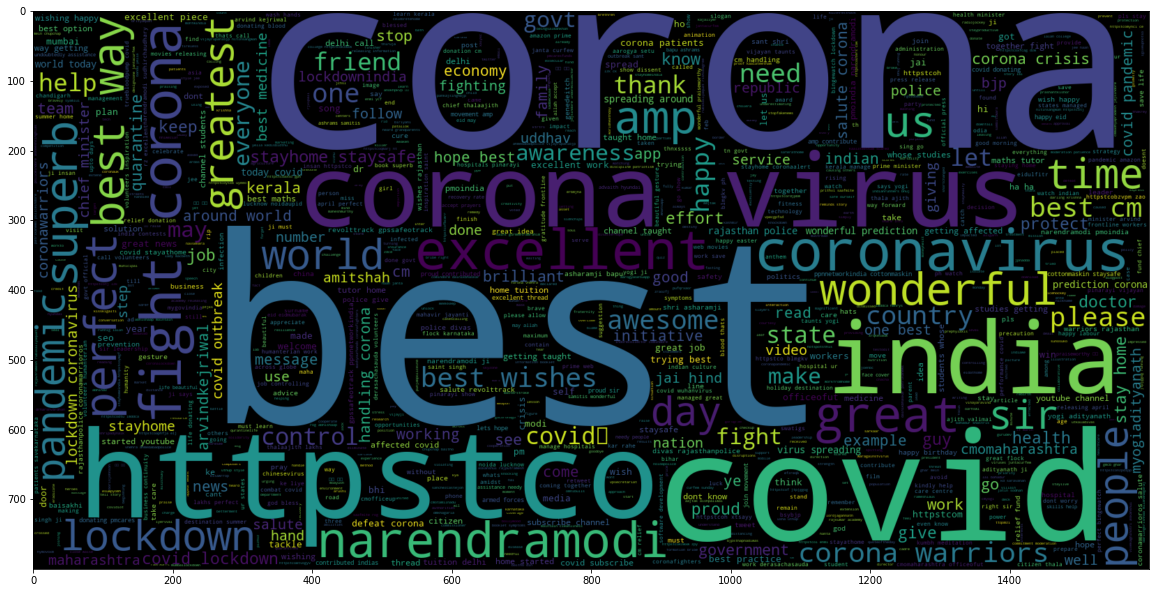

In [ ]:
# plot the word cloud for text with positive sentiment
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(data[data['d']==1]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

In [ ]:
data

,Text,d,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,@GHMCOnline @CPHydCity @MinisterKTR @Eatala_Ra...,0.120000,GHMCOnline CPHydCity MinisterKTR EatalaRajende...,"[ghmconline, cphydcity, ministerktr, eatalaraj...",ghmconline cphydcity ministerktr eatalarajende...
1,"""Delhi government will pay salaries to all con...",-0.033333,Delhi government will pay salaries to all cont...,"[delhi, government, pay, salaries, contract, w...",delhi government pay salaries contract workers...
2,@nitinbhatia121 NGO to save suffering humanity...,0.000000,nitinbhatia121 NGO to save suffering humanity ...,"[nitinbhatia, ngo, save, suffering, humanity, ...",nitinbhatia ngo save suffering humanity corona
3,All of us should participate in Janata curfew ...,0.000000,All of us should participate in Janata curfew ...,"[us, participate, janata, curfew, proposed, ht...",us participate janata curfew proposed httpstco...
4,Must watch \nStrong message 🙏🏻 #coronavirusind...,0.433333,Must watch \nStrong message 🙏🏻 coronavirusindi...,"[must, watch, strong, message, corona, gayacit...",must watch strong message corona gayacity vvi ...
...,...,...,...,...,...
177541,"As the cases are rising at a very high speed, ...",0.307394,As the cases are rising at a very high speed I...,"[cases, rising, high, speed, india, among, top...",cases rising high speed india among top countr...
177542,@KAMALSARIN6 @ShamikaRavi @PMOIndia @narendram...,0.032955,KAMALSARIN6 ShamikaRavi PMOIndia narendramodi ...,"[kamalsarin, shamikaravi, pmoindia, narendramo...",kamalsarin shamikaravi pmoindia narendramodi d...
177543,"For the first time perhaps, someone to took ti...",0.446429,For the first time perhaps someone to took tim...,"[first, time, perhaps, someone, took, time, ac...",first time perhaps someone took time acknowled...
177544,Odisha reports 129 new #COVID19 positive cases...,0.057576,Odisha reports 129 new COVID19 positive cases ...,"[odisha, reports, new, covid, positive, cases,...",odisha reports new covid positive cases taking...


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# word_tokenize is used to break up a string into words
print(data['Text Without Punc & Stopwords Joined'][0])
print(nltk.word_tokenize(data['Text Without Punc & Stopwords Joined'][0]))

ghmconline cphydcity ministerktr eatalarajender think restaurants must closed hyderabad restricts people gathering please take necessary actions restaurants remains open sincere thanks work stop corona virus httpstcorjw wdmd
['ghmconline', 'cphydcity', 'ministerktr', 'eatalarajender', 'think', 'restaurants', 'must', 'closed', 'hyderabad', 'restricts', 'people', 'gathering', 'please', 'take', 'necessary', 'actions', 'restaurants', 'remains', 'open', 'sincere', 'thanks', 'work', 'stop', 'corona', 'virus', 'httpstcorjw', 'wdmd']


In [ ]:
# Obtain the maximum length of data in the document
# This will be later used when word embeddings are generated
maxlen = -1
for doc in data['Text Without Punc & Stopwords Joined']:
    tokens = nltk.word_tokenize(doc)
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is:", maxlen)

The maximum number of words in any document is: 90


In [ ]:
tweets_length = [ len(nltk.word_tokenize(x)) for x in data['Text Without Punc & Stopwords Joined'] ]
tweets_length

[27,
 21,
 6,
 14,
 10,
 14,
 26,
 24,
 12,
 21,
 11,
 4,
 12,
 5,
 19,
 13,
 15,
 26,
 6,
 8,
 11,
 16,
 15,
 20,
 6,
 18,
 21,
 8,
 24,
 5,
 3,
 9,
 24,
 2,
 27,
 4,
 16,
 14,
 29,
 33,
 8,
 18,
 23,
 24,
 12,
 8,
 13,
 26,
 30,
 11,
 20,
 26,
 19,
 26,
 25,
 23,
 6,
 26,
 16,
 11,
 22,
 24,
 24,
 7,
 15,
 16,
 5,
 18,
 16,
 27,
 11,
 6,
 16,
 26,
 9,
 7,
 24,
 8,
 6,
 21,
 19,
 14,
 22,
 20,
 24,
 11,
 6,
 27,
 10,
 7,
 12,
 21,
 33,
 3,
 24,
 8,
 16,
 21,
 25,
 17,
 16,
 22,
 18,
 17,
 24,
 18,
 13,
 7,
 7,
 5,
 24,
 11,
 12,
 24,
 21,
 21,
 26,
 16,
 22,
 19,
 13,
 9,
 23,
 11,
 14,
 10,
 13,
 5,
 3,
 23,
 7,
 9,
 12,
 26,
 28,
 30,
 12,
 17,
 14,
 3,
 4,
 7,
 26,
 17,
 9,
 24,
 27,
 6,
 16,
 5,
 27,
 16,
 10,
 20,
 29,
 6,
 3,
 24,
 15,
 12,
 24,
 28,
 13,
 17,
 11,
 16,
 10,
 12,
 13,
 11,
 30,
 12,
 4,
 30,
 0,
 26,
 4,
 28,
 16,
 27,
 6,
 7,
 12,
 14,
 13,
 7,
 11,
 3,
 13,
 22,
 10,
 21,
 9,
 7,
 4,
 15,
 21,
 26,
 26,
 33,
 14,
 9,
 25,
 13,
 39,
 3,
 24,
 17,
 6,
 6,
 25,
 

In [ ]:
# Plot the distribution for the number of words in a text
fig = px.histogram(x = tweets_length, nbins = 100)
fig.show()

In [ ]:
data

,Text,d,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,@GHMCOnline @CPHydCity @MinisterKTR @Eatala_Ra...,0.120000,GHMCOnline CPHydCity MinisterKTR EatalaRajende...,"[ghmconline, cphydcity, ministerktr, eatalaraj...",ghmconline cphydcity ministerktr eatalarajende...
1,"""Delhi government will pay salaries to all con...",-0.033333,Delhi government will pay salaries to all cont...,"[delhi, government, pay, salaries, contract, w...",delhi government pay salaries contract workers...
2,@nitinbhatia121 NGO to save suffering humanity...,0.000000,nitinbhatia121 NGO to save suffering humanity ...,"[nitinbhatia, ngo, save, suffering, humanity, ...",nitinbhatia ngo save suffering humanity corona
3,All of us should participate in Janata curfew ...,0.000000,All of us should participate in Janata curfew ...,"[us, participate, janata, curfew, proposed, ht...",us participate janata curfew proposed httpstco...
4,Must watch \nStrong message 🙏🏻 #coronavirusind...,0.433333,Must watch \nStrong message 🙏🏻 coronavirusindi...,"[must, watch, strong, message, corona, gayacit...",must watch strong message corona gayacity vvi ...
...,...,...,...,...,...
177541,"As the cases are rising at a very high speed, ...",0.307394,As the cases are rising at a very high speed I...,"[cases, rising, high, speed, india, among, top...",cases rising high speed india among top countr...
177542,@KAMALSARIN6 @ShamikaRavi @PMOIndia @narendram...,0.032955,KAMALSARIN6 ShamikaRavi PMOIndia narendramodi ...,"[kamalsarin, shamikaravi, pmoindia, narendramo...",kamalsarin shamikaravi pmoindia narendramodi d...
177543,"For the first time perhaps, someone to took ti...",0.446429,For the first time perhaps someone to took tim...,"[first, time, perhaps, someone, took, time, ac...",first time perhaps someone took time acknowled...
177544,Odisha reports 129 new #COVID19 positive cases...,0.057576,Odisha reports 129 new COVID19 positive cases ...,"[odisha, reports, new, covid, positive, cases,...",odisha reports new covid positive cases taking...


In [ ]:
# Obtain the total words present in the dataset
list_of_words = []
for i in data['Text Without Punc & Stopwords']:
    for j in i:
        list_of_words.append(j)


In [ ]:
list_of_words

['ghmconline',
 'cphydcity',
 'ministerktr',
 'eatalarajender',
 'think',
 'restaurants',
 'must',
 'closed',
 'hyderabad',
 'restricts',
 'people',
 'gathering',
 'please',
 'take',
 'necessary',
 'actions',
 'restaurants',
 'remains',
 'open',
 'sincere',
 'thanks',
 'work',
 'stop',
 'corona',
 'virus',
 'httpstcorjw',
 'wdmd',
 'delhi',
 'government',
 'pay',
 'salaries',
 'contract',
 'workers',
 'daily',
 'wage',
 'labourers',
 'guest',
 'teachers',
 'etc',
 'whose',
 'offices',
 'declared',
 'closed',
 'orders',
 'related',
 'corona',
 'virus',
 'msisodia',
 'nitinbhatia',
 'ngo',
 'save',
 'suffering',
 'humanity',
 'corona',
 'us',
 'participate',
 'janata',
 'curfew',
 'proposed',
 'httpstcoay',
 'bkjuwy',
 'definately',
 'help',
 'deterring',
 'corona',
 'advancement',
 'jai',
 'hind',
 'must',
 'watch',
 'strong',
 'message',
 'corona',
 'gayacity',
 'vvi',
 'bihar',
 'httpstco',
 'izwdnsufh',
 'thekanikakapoor',
 'deserve',
 'coz',
 'negligence',
 'pushed',
 'many',
 'impo

In [ ]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

153181

In [ ]:
# split the data into test and train 
X = data['Text Without Punc & Stopwords']
y = data.iloc[:,1]



In [ ]:
y

0         0.120000
1        -0.033333
2         0.000000
3         0.000000
4         0.433333
            ...   
177541    0.307394
177542    0.032955
177543    0.446429
177544    0.057576
177545    0.200000
Name: d, Length: 177546, dtype: float64

In [ ]:
y.shape

(177546,)

In [ ]:
for i in range(0,177546):
  if(y[i]>0.0):
    y[i]=1
  else:
    y[i]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
set(y)

{0.0, 1.0}

In [ ]:
len(y)

177546

In [ ]:
y

0         1.0
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
177541    1.0
177542    1.0
177543    1.0
177544    1.0
177545    1.0
Name: d, Length: 177546, dtype: float64

In [ ]:
mined = pd.read_csv(".................",usecols=[1])

In [ ]:
mined['Text'][0]

'#COVID19 death toll breaches 900-mark in #Odisha '

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
mined['Text Without Punctuation'] = mined['Text'].apply(remove_punc)

In [ ]:
mined

,Text,Text Without Punctuation
0,#COVID19 death toll breaches 900-mark in #Odisha,COVID19 death toll breaches 900mark in Odisha
1,as per this data by @MoHFW_INDIA #Kerala is a...,as per this data by MoHFWINDIA Kerala is at t...
2,Not anymore.. #COVID19 #lockdown #Ontario #Do...,Not anymore COVID19 lockdown Ontario DougFord
3,White House Aids release photos of President #...,White House Aids release photos of President T...
4,@GovMikeDeWine @LtGovHusted Where is the Praye...,GovMikeDeWine LtGovHusted Where is the Prayer ...
...,...,...
6643,#SuperSpreaderTrump We can hear your breathing...,SuperSpreaderTrump We can hear your breathing ...
6644,Trump was a #superspreader of #disinformatin ...,Trump was a superspreader of disinformatin be...
6645,#LindseyGraham looks like he has #COVID19 #Lin...,LindseyGraham looks like he has COVID19 Lindse...
6646,ALERT: Raiders fined again for more COVID-19 t...,ALERT Raiders fined again for more COVID19 tro...


In [ ]:
# download stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.remove('not')


In [ ]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 1 and token not in stop_words:
            result.append(token)
            
    return result

In [ ]:
# apply pre-processing to the text column
mined['Text Without Punc & Stopwords'] = mined['Text Without Punctuation'].apply(preprocess)

In [ ]:
# join the words into a string
mined['Text Without Punc & Stopwords Joined'] = mined['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))

In [ ]:
# word_tokenize is used to break up a string into words
print(mined['Text Without Punc & Stopwords Joined'][0])
print(nltk.word_tokenize(mined['Text Without Punc & Stopwords Joined'][0]))

covid death toll breaches mark odisha
['covid', 'death', 'toll', 'breaches', 'mark', 'odisha']


In [ ]:
mined

,Text,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,#COVID19 death toll breaches 900-mark in #Odisha,COVID19 death toll breaches 900mark in Odisha,"[covid, death, toll, breaches, mark, odisha]",covid death toll breaches mark odisha
1,as per this data by @MoHFW_INDIA #Kerala is a...,as per this data by MoHFWINDIA Kerala is at t...,"[per, data, mohfwindia, kerala, bottom, recove...",per data mohfwindia kerala bottom recovery rat...
2,Not anymore.. #COVID19 #lockdown #Ontario #Do...,Not anymore COVID19 lockdown Ontario DougFord,"[not, anymore, covid, lockdown, ontario, dougf...",not anymore covid lockdown ontario dougford
3,White House Aids release photos of President #...,White House Aids release photos of President T...,"[white, house, aids, release, photos, presiden...",white house aids release photos president trum...
4,@GovMikeDeWine @LtGovHusted Where is the Praye...,GovMikeDeWine LtGovHusted Where is the Prayer ...,"[govmikedewine, ltgovhusted, prayer, day, covi...",govmikedewine ltgovhusted prayer day covid dea...
...,...,...,...,...
6643,#SuperSpreaderTrump We can hear your breathing...,SuperSpreaderTrump We can hear your breathing ...,"[hear, breathing, difficulties, due, covid, kn...",hear breathing difficulties due covid know vir...
6644,Trump was a #superspreader of #disinformatin ...,Trump was a superspreader of disinformatin be...,"[trump, superspreader, disinformatin, became, ...",trump superspreader disinformatin became super...
6645,#LindseyGraham looks like he has #COVID19 #Lin...,LindseyGraham looks like he has COVID19 Lindse...,"[lindseygraham, looks, like, covid]",lindseygraham looks like covid
6646,ALERT: Raiders fined again for more COVID-19 t...,ALERT Raiders fined again for more COVID19 tro...,"[alert, raiders, fined, covid, trouble, global...",alert raiders fined covid trouble global pande...


In [ ]:
# Obtain the maximum length of data in the document
# This will be later used when word embeddings are generated
maxlen = -1
for doc in mined['Text Without Punc & Stopwords Joined']:
    tokens = nltk.word_tokenize(doc)
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is:", maxlen)

The maximum number of words in any document is: 71


In [ ]:
# Obtain the total words present in the dataset
list_of_words1 = []
for i in mined['Text Without Punc & Stopwords']:
    for j in i:
        list_of_words1.append(j)

In [ ]:
# Obtain the total number of unique words
total_words1 = len(list(set(list_of_words1)))
total_words= total_words+total_words1
total_words

171549

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
X_test= mined['Text Without Punc & Stopwords']

In [ ]:
X_train.shape

(159791,)

In [ ]:
X_test.shape

(6648,)

In [ ]:
X_train

71744     [opinion, unfortunately, lockdown, prevented, ...
55151     [dear, facultiesstaff, students, kindly, share...
66401     [job, write, big, complex, algorithms, providi...
55856     [corona, crisis, lockdowns, threatening, pr, o...
123606    [rahulkanwal, not, bcoz, corona, didnt, cared,...
                                ...                        
92052     [vivek, arnabbasu, sganguly, filterkapii, ah, ...
98137                [great, support, httpstcoriro, mu, af]
21819     [start, business, zero, investment, lacs, coll...
61110     [norbertelekes, corona, virus, thing, made, ch...
91640     [defeat, corona, aware, amp, stay, healthy, am...
Name: Text Without Punc & Stopwords, Length: 159791, dtype: object

In [ ]:
X_test

0            [covid, death, toll, breaches, mark, odisha]
1       [per, data, mohfwindia, kerala, bottom, recove...
2       [not, anymore, covid, lockdown, ontario, dougf...
3       [white, house, aids, release, photos, presiden...
4       [govmikedewine, ltgovhusted, prayer, day, covi...
                              ...                        
6643    [hear, breathing, difficulties, due, covid, kn...
6644    [trump, superspreader, disinformatin, became, ...
6645                  [lindseygraham, looks, like, covid]
6646    [alert, raiders, fined, covid, trouble, global...
6647    [pandemic, archive, digital, artist, jon, ostr...
Name: Text Without Punc & Stopwords, Length: 6648, dtype: object

In [ ]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X)#X_train   tha 

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)


In [ ]:
train_sequences

[[1506,
  2117,
  10,
  5271,
  146,
  131283,
  6032,
  2850,
  18473,
  1925,
  46,
  15074,
  6032,
  5,
  100,
  2886,
  455,
  2958,
  7898,
  100,
  32088,
  6,
  131284,
  131285],
 [142,
  108983,
  403,
  273,
  110,
  38,
  970,
  2,
  27887,
  32430,
  565,
  196,
  2068,
  2,
  25478,
  108984,
  19399,
  21562,
  40790,
  22702,
  108985,
  25478,
  19399,
  40790,
  22702,
  21562,
  108986,
  108987],
 [248,
  1442,
  230,
  3605,
  28421,
  277,
  14543,
  28656,
  7851,
  17484,
  28421,
  48,
  272,
  1247,
  248,
  465,
  265,
  108,
  9445],
 [1,
  51,
  2477,
  2941,
  1333,
  22726,
  15908,
  590,
  8021,
  6739,
  9715,
  9089,
  4509,
  312,
  1333,
  805,
  851,
  1333,
  6,
  5040,
  109966,
  590,
  793,
  1411],
 [1242,
  5,
  1188,
  1,
  544,
  9580,
  1088,
  1558,
  1764,
  528,
  2453,
  230,
  551,
  73,
  27,
  1558,
  3267],
 [6462,
  4989,
  1078,
  2000,
  587,
  15,
  1078,
  21,
  4486,
  45347,
  1,
  241,
  7172,
  9073,
  1629,
  1523,
  5103

In [ ]:
test_sequences

[[2, 73, 253, 14028, 683, 331],
 [157,
  272,
  173,
  221,
  2658,
  321,
  182,
  295,
  261,
  11,
  50,
  326,
  73,
  182,
  34,
  1251,
  44,
  195,
  535,
  11,
  478,
  675,
  141,
  9,
  276,
  2,
  2],
 [5, 2929, 2, 10, 119786],
 [2350, 533, 3168, 579, 4409, 629, 364, 127, 1110, 2],
 [1967, 41, 2, 606, 2359],
 [43,
  855,
  186,
  2,
  858,
  94,
  1769,
  8139,
  782,
  569,
  2845,
  25847,
  11091,
  192,
  35,
  155,
  8014],
 [2,
  4,
  5,
  45,
  185,
  31,
  11,
  14,
  606,
  43,
  150,
  12,
  303,
  925,
  254,
  64,
  508,
  1025,
  383,
  12,
  2,
  7,
  19305],
 [9190, 2, 331, 253, 14028, 683, 57766, 430, 1201, 60],
 [139, 1541, 1143, 14242, 2],
 [25900, 3324, 2, 878],
 [2, 38636, 4002, 857],
 [5494, 1980, 172, 11236, 19399, 39392, 266, 35, 2],
 [2, 1591, 649, 3923, 694, 1683, 22893, 300, 59, 131241],
 [1597, 371, 34, 1597, 3931, 5167, 2003, 639, 3, 2, 758, 403, 38, 466, 1686],
 [33, 18, 316, 1429, 9202, 1722, 2920, 89, 22, 2],
 [2, 35, 1948, 364, 537, 871, 8, 25

In [ ]:
print("The encoding for document\n", X_train[1:2],"\n is: ", train_sequences[1])

The encoding for document
 55151    [dear, facultiesstaff, students, kindly, share...
Name: Text Without Punc & Stopwords, dtype: object 
 is:  [142, 108983, 403, 273, 110, 38, 970, 2, 27887, 32430, 565, 196, 2068, 2, 25478, 108984, 19399, 21562, 40790, 22702, 108985, 25478, 19399, 40790, 22702, 21562, 108986, 108987]


In [ ]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 71, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 71, padding='post', truncating = 'post')

In [ ]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [  1506   2117     10   5271    146 131283   6032   2850  18473   1925
     46  15074   6032      5    100   2886    455   2958   7898    100
  32088      6 131284 131285      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0]
The padded encoding for document: 2  is: [   142 108983    403    273    110     38    970      2  27887  32430
    565    196   2068      2  25478 108984  19399  21562  40790  22702
 108985  25478  19399  40790  22702  21562 108986 108987      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0 

In [ ]:
# Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
#y_test_cat = to_categorical(y_test, 2)

In [ ]:
y_train_cat.shape

(159791, 2)

In [ ]:
#y_test_cat.shape

In [ ]:
y_train_cat

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 256))

model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 256)         43916544  
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 44,343,938
Trainable params: 44,343,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train the model
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 5)

Epoch 1/5
3995/3995 [==============================] - 2941s 736ms/step - loss: 0.2420 - acc: 0.9078 - val_loss: 0.1417 - val_acc: 0.9518
Epoch 2/5
3995/3995 [==============================] - 2995s 750ms/step - loss: 0.0558 - acc: 0.9819 - val_loss: 0.1178 - val_acc: 0.9660
Epoch 3/5
3995/3995 [==============================] - 2992s 749ms/step - loss: 0.0137 - acc: 0.9956 - val_loss: 0.1394 - val_acc: 0.9712
Epoch 4/5
3995/3995 [==============================] - 2953s 739ms/step - loss: 0.0057 - acc: 0.9981 - val_loss: 0.1703 - val_acc: 0.9687
Epoch 5/5
3995/3995 [==============================] - 3055s 765ms/step - loss: 0.0028 - acc: 0.9992 - val_loss: 0.2045 - val_acc: 0.9670


In [ ]:
# make prediction
pred = model.predict(padded_test)

In [ ]:
pred

array([[9.9999976e-01, 2.1132583e-07],
       [4.2576180e-06, 9.9999571e-01],
       [9.8755974e-01, 1.2440307e-02],
       ...,
       [9.9963105e-01, 3.6899134e-04],
       [9.9995446e-01, 4.5541223e-05],
       [9.9992073e-01, 7.9231606e-05]], dtype=float32)

In [ ]:
# make prediction
prediction = []
for i in pred:
  #print(i)
  prediction.append(np.argmax(i))

In [ ]:
# importing pandas as pd  
import pandas as pd  
   
# list of name, degree, score 

# dictionary of lists  
dict = {'Text':mined['Text'], ' predicted sentiment': prediction}  
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('file1.csv') 